In [65]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

## Load the data
[Data Source](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)  
TODO: automate data loading

In [111]:
url_confirmed = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_conf = pd.read_csv(url_confirmed)
df_dead = pd.read_csv(url_deaths)
df_reco = pd.read_csv(url_recovered)

dates = df_conf.columns[4:]
if dates.any():
    print("Data from {} to {}".format(dates[0], dates[-1]))
df_conf = df_conf.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                        value_vars=dates, var_name='Date', value_name='Confirmed')
df_dead = df_dead.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                        value_vars=dates, var_name='Date', value_name='Deaths')
df_reco = df_reco.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                        value_vars=dates, var_name='Date', value_name='Recovered')
#full table combinig all confirmed,recovered and deaths 
df_all = pd.concat([df_conf, df_dead['Deaths'], df_reco['Recovered']], 
                       axis=1, sort=False)
df_all['Active'] = df_all['Confirmed'] - df_all['Deaths'] - df_all['Recovered']

Data from 1/22/20 to 3/28/20


In [46]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16951 entries, 0 to 16950
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  5293 non-null   object 
 1   Country/Region  16951 non-null  object 
 2   Lat             16951 non-null  float64
 3   Long            16951 non-null  float64
 4   Date            16951 non-null  object 
 5   Confirmed       16951 non-null  int64  
 6   Deaths          16951 non-null  int64  
 7   Recovered       16013 non-null  float64
 8   Active          16013 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.2+ MB


## Explore Canada cases

In [128]:
df_can = df_all.groupby("Country/Region").get_group("Canada")
# df_can.set_index('Date', inplace=True)
# print("Canada data from {} to {}".format())
df_can.head()

Province/State Country/Region      Lat      Long     Date  Confirmed  \
35           Alberta         Canada  53.9333 -116.5765  1/22/20          0   
36  British Columbia         Canada  49.2827 -123.1207  1/22/20          0   
37    Grand Princess         Canada  37.6489 -122.6655  1/22/20          0   
38          Manitoba         Canada  53.7609  -98.8139  1/22/20          0   
39     New Brunswick         Canada  46.5653  -66.4619  1/22/20          0   

    Deaths  Recovered  Active  
35       0        0.0     0.0  
36       0        0.0     0.0  
37       0        0.0     0.0  
38       0        0.0     0.0  
39       0        0.0     0.0

In [131]:
df_prov = df_can[["Date", "Province/State", "Confirmed"]]#.groupby("Province/State")
px.line(df_prov, x="Date", y="Confirmed", color="Province/State", title="Confirmed Cases in Canada")

## Bar Chart Race

In [133]:
adj_dates = df_all.Date.unique()

array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
       '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20',
       '3/28/20'], dtype=object)

In [137]:
def genratepseudorandomcolors():
    import random
    from colour import Color
    random_i = random.randint(0,10000000)
    random_j = random.randint(0,10000000)
    c = Color(random_i,random_j)
    hex_number = c.hex_l
    return hex_number

In [177]:
def draw_barchart_conf(df: pd.DataFrame, current_date: str, colorsset):
    start_date ='1/22/20'
    current_date = start_date
    #creating dataframe for plotting 
    #In each loop it contains top 10 coutires having most number of confirmed cases
    dff = df[df['Date'].eq(current_date)].groupby('Country/Region').sum().sort_values(by='Confirmed', ascending=False).head(10)
    dff = dff.reset_index()
    dff = dff[::-1]
    
    
    
    #Now, let's plot a basic bar chart. We start by creating a figure and an axes.
    #Then, we use `ax.barh(x, y)` to draw horizontal barchart.

    
    ax.clear()
    ax.barh(dff['Country/Region'], dff['Confirmed'], color=[colorsset[x] for x in dff['Country/Region']])
    dx = dff['Confirmed'].max() / 200
    
    
    #Next, let's add text,color,labels

    for i, (value, name) in enumerate(zip(dff['Confirmed'], dff['Country/Region'])):
        
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    
    
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    #adding other textual infomations
    ax.text(0, 1.15, 'Most number of confirmed cases in the world from 1/22/20',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)


In [174]:
def draw_barchart_conf_prov_state(df: pd.DataFrame, country: str, current_date: str, colorsset):

    dff = df[df['Date'].eq(current_date)].groupby('Country/Region').get_group(country).groupby("Province/State").sum().sort_values(by='Confirmed', ascending=False).head(10)
    dff = dff.reset_index()
    dff = dff[::-1]
    
    ax.clear()
    ax.barh(dff['Province/State'], dff['Confirmed'], color=[colorsset[x] for x in dff['Province/State']])
    dx = dff['Confirmed'].max() / 200


    for i, (value, name) in enumerate(zip(dff['Confirmed'], dff['Province/State'])):
        
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    
    
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    #adding other textual infomations
    ax.text(0, 1.15, 'Number of confirmed cases in {} from 1/22/20'.format(country),
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
#     ax.text(1, 0, 'by @aryanc55', transform=ax.transAxes, color='#777777', ha='right',
#             bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

In [178]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
def get_draw_fn(df: pd.DataFrame):
    colours = []
    for i in range(len(df_all['Country/Region'].unique())) :
        colours.append(genratepseudorandomcolors())

    colorsset = dict(zip(
        [i for i in df_all['Country/Region'].unique()],
        colours
    ))
    def _draw_fn(current_date: str):
        return draw_barchart_conf(df, current_date, colorsset)
    return _draw_fn
def get_draw_fn_country(df: pd.DataFrame, country: str):
    colours = []
    for i in range(len(df.groupby('Country/Region').get_group(country)["Province/State"].unique())) :
        colours.append(genratepseudorandomcolors())
    colorsset = dict(zip(
        [i for i in df.groupby('Country/Region').get_group(country)["Province/State"].unique()],
        colours
    ))
    def _draw_fn(current_date: str):
        return draw_barchart_conf_prov_state(df, country, current_date, colorsset)
    return _draw_fn

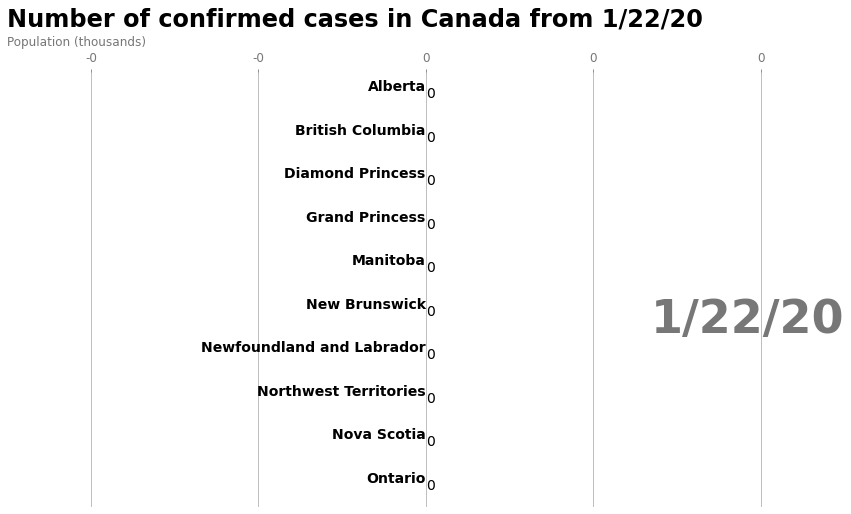

In [176]:
fig, ax = plt.subplots(figsize=(15, 8))
interval = 500  # ms pause btwn frames
animator = animation.FuncAnimation(fig, get_draw_fn_country(df_all, "Canada"), frames=adj_dates, interval=interval)
HTML(animator.to_jshtml())